#  Late Night Revelers

C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS


|Code      | Description                                                                                  |
|:-------- |:----------------------------------------------------------------------------------------------- | 
| C/A      | Control Area (A002)                                                                          | 
| UNIT     | Remote Unit for a station (R051)                                                             | 
| SCP      | Subunit Channel Position represents an specific address for a device (02-00-00)              | 
| STATION  | Represents the station name the device is located at                                         | 
| LINENAME | Represents all train lines that can be boarded at this station                               | 
|          |   Normally lines are represented by one character.  LINENAME 456NQR repersents train server for | 
|          |   4, 5, 6, N, Q, and R trains.                                                                  | 
| DIVISION | Represents the Line originally the station belonged to BMT, IRT, or IND                      | 
| DATE     | Represents the date (MM-DD-YY)                                                               |   
| TIME     | Represents the time (hh:mm:ss) for a scheduled audit event                                   | 
| DESc     | Represents the "REGULAR" scheduled audit event (Normally occurs every 4 hours)                | 
|          |   1. Audits may occur more than 4 hours due to planning, or troubleshooting activities.         | 
|          |   2. Additionally, there may be a "RECOVR AUD" entry: This refers to a missed audit that was recovered. |
|ENTRIES   | The cumulative entry register value for a device|
|EXIST     | The cumulative exit register value for a device|


In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# enables inline plots, without it, plots don't show up in the notebook
%matplotlib inline

In [2]:
data = pd.read_csv('../data/mta/turnstile.csv', parse_dates=['Datetime'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533425 entries, 0 to 2533424
Data columns (total 12 columns):
C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES     int64
EXITS       int64
Datetime    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 231.9+ MB


In [3]:
data.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Datetime
0,A002,R051,02-00-00,59 ST,NQR456,BMT,03/12/2016,03:00:00,REGULAR,5583673,1884949,2016-03-12 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456,BMT,03/12/2016,07:00:00,REGULAR,5583689,1884968,2016-03-12 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456,BMT,03/12/2016,11:00:00,REGULAR,5583785,1885067,2016-03-12 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456,BMT,03/12/2016,15:00:00,REGULAR,5584037,1885157,2016-03-12 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456,BMT,03/12/2016,19:00:00,REGULAR,5584482,1885250,2016-03-12 19:00:00
5,A002,R051,02-00-00,59 ST,NQR456,BMT,03/12/2016,23:00:00,REGULAR,5584768,1885284,2016-03-12 23:00:00
6,A002,R051,02-00-00,59 ST,NQR456,BMT,03/13/2016,04:00:00,REGULAR,5584835,1885305,2016-03-13 04:00:00
7,A002,R051,02-00-00,59 ST,NQR456,BMT,03/13/2016,08:00:00,REGULAR,5584851,1885325,2016-03-13 08:00:00
8,A002,R051,02-00-00,59 ST,NQR456,BMT,03/13/2016,12:00:00,REGULAR,5584909,1885403,2016-03-13 12:00:00
9,A002,R051,02-00-00,59 ST,NQR456,BMT,03/13/2016,16:00:00,REGULAR,5585119,1885458,2016-03-13 16:00:00


# Extraction Deltas

The turnstiles have cumulative results, which is reset time-to-time. In order to obtain the number of passenger at the station in a specific interval, we must calculate the variance.

In [4]:
tmp = data.sort_values(['C/A', 'UNIT', 'STATION','SCP', 'Datetime'],
                       ascending =True, kind=' mergesort').copy()
tmp['Delta_ENTRIES'] = np.nan
tmp['Delta_EXITS'] = np.nan
tmp = tmp.groupby(['C/A', 'UNIT', 'STATION','SCP','Datetime']).sum()

print(tmp.shape)
tmp.sample(10)

(2533407, 4)


,,,,,ENTRIES,EXITS,Delta_ENTRIES,Delta_EXITS
C/A,UNIT,STATION,SCP,Datetime,,,,
N545,R204,CHURCH AV,01-06-02,2016-02-29 11:00:00,6031162,2262275,NaN,NaN
R180,R193,157 ST,00-00-01,2016-01-05 08:00:00,4112308,357531,NaN,NaN
N561,R271,AVENUE X,00-00-01,2016-02-28 11:00:00,5007457,2705095,NaN,NaN
R142,R293,34 ST-PENN STA,01-00-02,2016-02-14 17:00:00,4925686,4297588,NaN,NaN
A034,R170,14 ST-UNION SQ,03-06-02,2016-02-06 12:00:00,1276976,1110479,NaN,NaN
R113,R028,FULTON ST,01-06-03,2016-02-25 10:00:00,285901,62697,NaN,NaN
N030,R333,116 ST,00-00-02,2016-02-18 04:00:00,117515,24862,NaN,NaN
R166,R167,86 ST,02-00-02,2016-01-08 08:00:00,2127076,2477240,NaN,NaN
N186,R418,BEACH 105 ST,00-00-01,2016-03-15 01:00:00,521303,599580,NaN,NaN


In [5]:
# Create index to calculate Variation
key_index = tmp.reset_index().ix[:, ['C/A', 'UNIT', 'STATION','SCP'] ].drop_duplicates().copy()
key_index.sort_values(['C/A', 'UNIT', 'STATION','SCP'], ascending =True, kind=' mergesort')
key_index = [list(key_index.iloc[i,:]) for i in range(key_index.shape[0])]

key_index[:5]

[['A002', 'R051', '59 ST', '02-00-00'],
 ['A002', 'R051', '59 ST', '02-00-01'],
 ['A002', 'R051', '59 ST', '02-03-00'],
 ['A002', 'R051', '59 ST', '02-03-01'],
 ['A002', 'R051', '59 ST', '02-03-02']]

In [6]:
# Calculate Deltas.
# warning: This may take some time.
idx = pd.IndexSlice
for  _, (i0, i1, i2, i3) in  enumerate(key_index):
    px = idx[i0, i1, i2, i3,:]
    
    delta = tmp.loc[px, [idx['ENTRIES']]].shift(-1) - tmp.loc[px, [idx['ENTRIES']]]
    tmp.loc[px, [idx['Delta_ENTRIES']]] = delta['ENTRIES'].values
    
    delta = tmp.loc[px, [idx['EXITS']]].shift(-1) - tmp.loc[px, [idx['EXITS']]]
    tmp.loc[px, [idx['Delta_EXITS']]] = delta['EXITS'].values


In [7]:
tmp.sample(10)

,,,,,ENTRIES,EXITS,Delta_ENTRIES,Delta_EXITS
C/A,UNIT,STATION,SCP,Datetime,,,,
C015,R454,PROSPECT AV,00-00-02,2016-01-08 11:00:00,3108420,6708982,119.0,166.0
R226,R131,23 ST,02-06-01,2016-01-07 08:00:00,1,282,0.0,0.0
N336,R158,KEW GARDENS,00-00-04,2016-01-12 13:30:00,10106519,1163522,280.0,156.0
R532,R328,METS-WILLETS PT,00-05-00,2016-02-29 20:00:00,1774840,821161,0.0,0.0
R202,R042,BOWLING GREEN,00-00-01,2016-02-22 11:00:00,781156,3344490,74.0,435.0
N559,R425,AVENUE U,00-06-00,2016-03-12 20:00:00,168286450,16825891,15.0,0.0
A014,R081,49 ST,02-00-01,2016-03-09 07:00:00,5585264,2752173,6.0,71.0
N412,R299,BROADWAY,00-00-00,2016-02-01 04:00:00,1826775,2439640,179.0,189.0
N114,R297,FRANKLIN AV,01-00-00,2016-02-24 12:00:00,1247512,7046392,48.0,284.0


# Identify Anomalies

Due to machine failure and possible error during data storage, some results are negative or too high.
To ensure the "delta values" are valid, we assign unlike values as ```NaN``` values.

In [8]:
def plot_hist(x,name):
    
    plt.figure(1,figsize=(28,10))
    mask = x > 0 & (~np.isnan(x))
    plt.subplot(131)
    plt.hist(x[mask], bins= 200)
    plt.title("Histogram of Delta " + name);
    plt.xlabel('Number of Passengers')
    plt.ylabel('Frequency')

    mask = x >= 0 & (~np.isnan(x))
    plt.subplot(132)
    plt.hist(np.log(x[mask] + 1), bins= 200)
    plt.title("Histogram of Log Delta " + name);
    plt.xlabel('Number of Passengers')
    
    mask = x > 0 & (~np.isnan(x))
    plt.subplot(133)
    plt.hist(np.log(x[mask] + 1), bins= 200)
    plt.title("Histogram of Log Delta " + name + " (no zeros)");
    plt.xlabel('Number of Passengers')
    
    print('Max: %d' % np.nanmax(x))
    print('Min: %d' % np.nanmin(x))
    

Max: 2122354969
Min: -1877466424


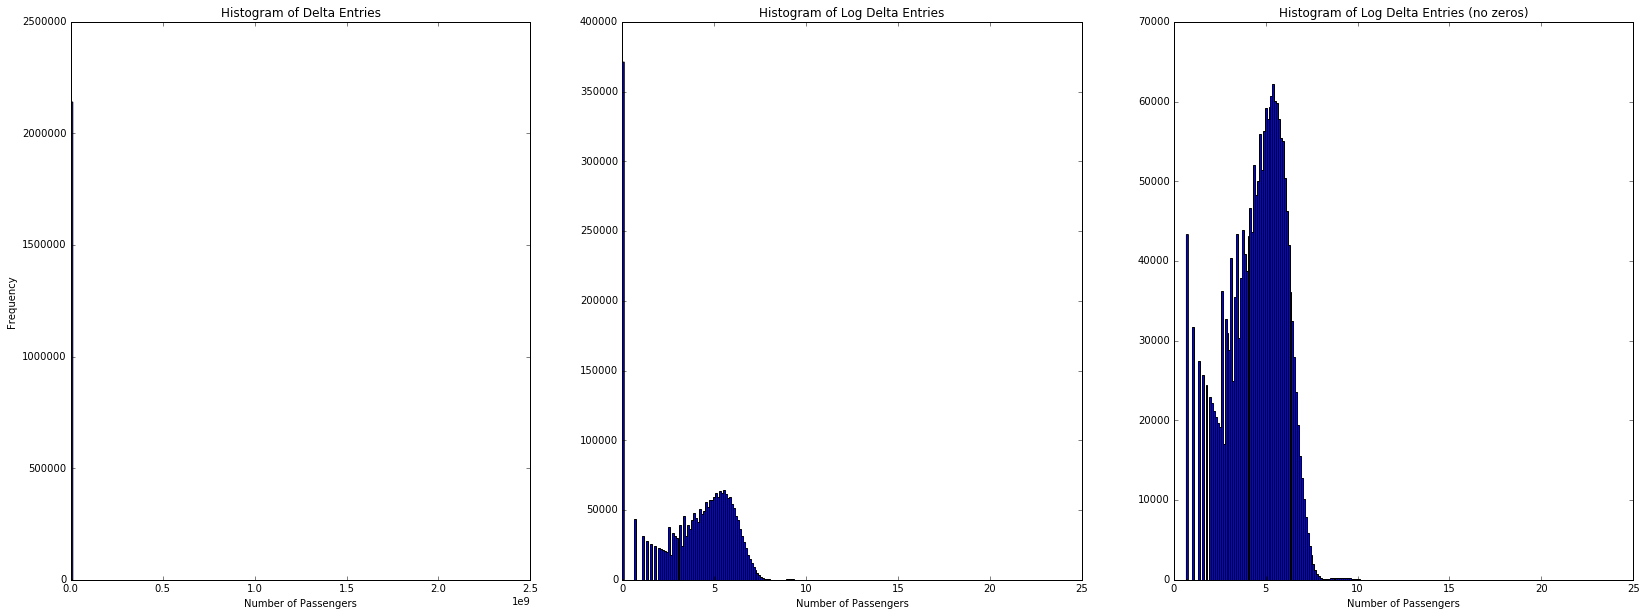

In [9]:
plot_hist(x=tmp.Delta_ENTRIES.dropna().copy().values,name='Entries')

Max: 2088918757
Min: -1946115181


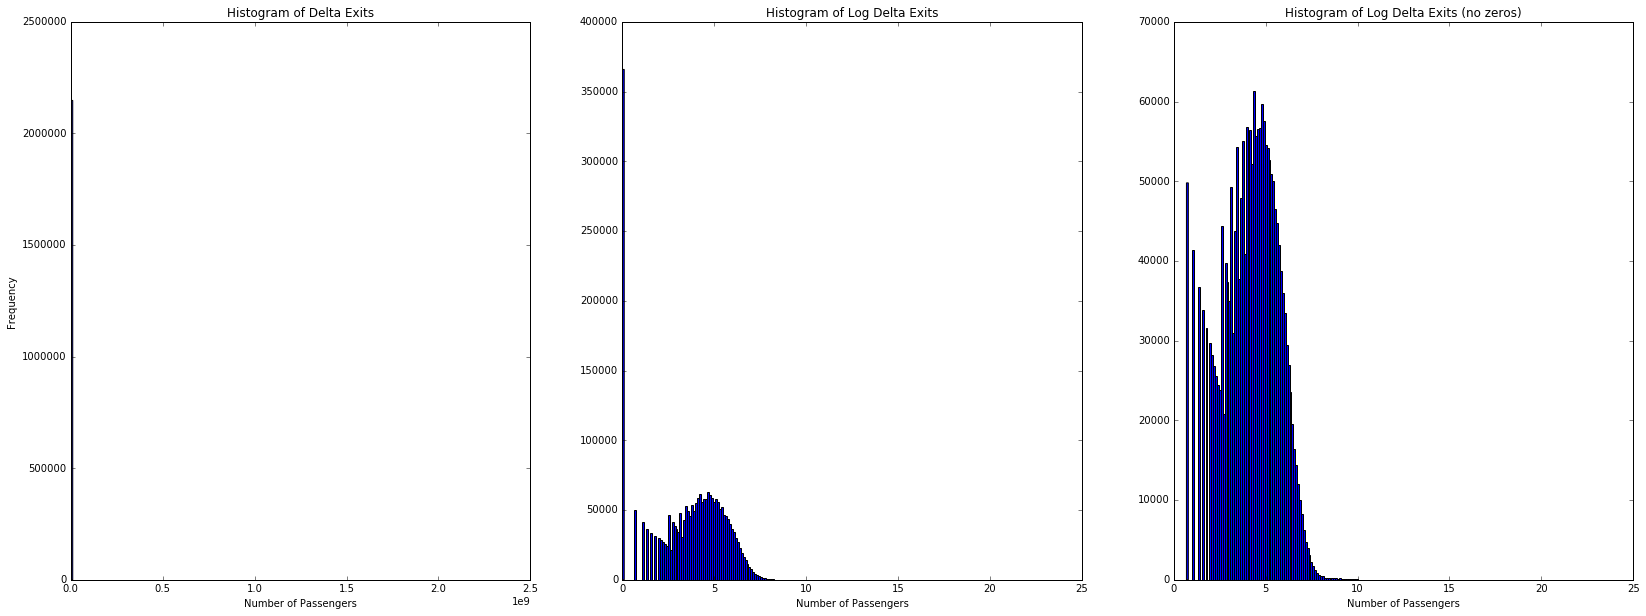

In [10]:
plot_hist(x=tmp.Delta_EXITS.dropna().copy().values, name='Exits')

It clear that the distribution is very skewed, even after the log transformation.
Also, there are a high number of zeros. It may sound odd, but it is reasonable because many stations stay closed or have very low use at specific time frames.

In order to avoid removing too many values, we remove the anomalies at the turnstile then aggregate the results by station.

In [11]:
def remove_anomalies(X):
    """This function removes unusual values"""
    
    #Set negative values to NaN
    mask = X < 0
    X[mask] = np.nan
    
    mask = X <= 0 | np.isnan(X)
    if len(X[mask]) == 0:
        return(X)
    
    #Use log to have it closer to a normal distribution
    X_log = np.log(X.copy() + 1)
    
    x_bar = np.nanmean(X_log)
    sigma = np.nanstd(X_log)
    
    # Set extreme values as NaN
    mask = X_log > (x_bar + 3*sigma)
    
    X[mask] = np.nan
    
    return(X)

In [12]:
# Remove anomalies at turnstile level.
tmp.Delta_ENTRIES  = remove_anomalies(tmp.Delta_ENTRIES.values)
tmp.Delta_EXITS  = remove_anomalies(tmp.Delta_EXITS.values)

# idx = pd.IndexSlice
# for  _, (i0, i1, i2, i3) in  enumerate(key_index):
    
#     px = idx[i0, i1, i2, i3,:]
#     #print(tmp.Delta_ENTRIES.loc[px].sample(10))
    
#     tmp.loc[px, [idx['Delta_ENTRIES']]]  = remove_anomalies(tmp.Delta_ENTRIES.loc[px].values)
#     tmp.loc[px, [idx['Delta_EXITS']]]  = remove_anomalies(tmp.Delta_EXITS.loc[px].values)

Max: 27240
Min: 0


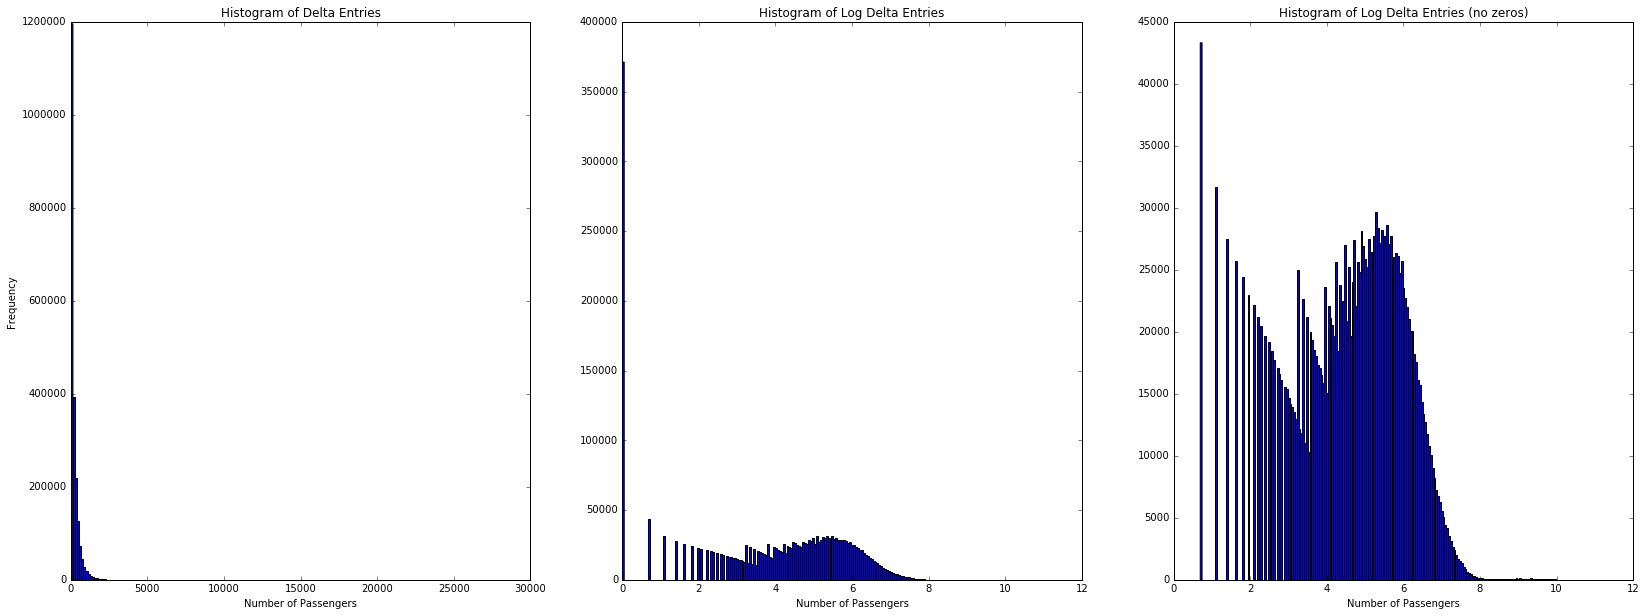

In [13]:
plot_hist(x=tmp.Delta_ENTRIES.dropna().copy().values,name='Entries')

Max: 14812
Min: 0


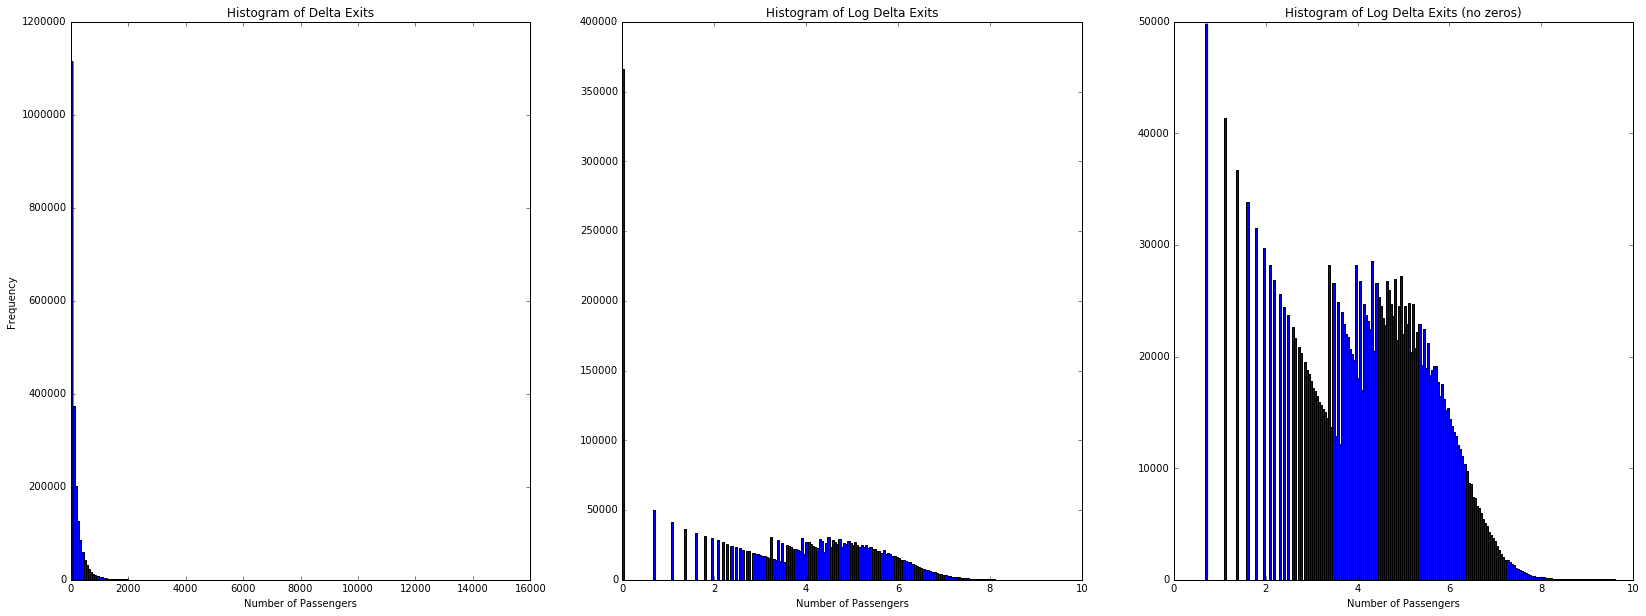

In [14]:
plot_hist(x=tmp.Delta_EXITS.dropna().copy().values,name='Exits')

# Aggregate Delta by Station

After calculating Deltas and removing anomalies, it is time to aggregate results by station.
First, we round the ```datetime``` to the nearest hour.

In [15]:
def round_datetime(x):
    second = x.second
    minute = x.minute
    hour = x.hour
    date= x.date()
    
    #round second
    if second < 30:
        second = 0
    else:
        second = 0
        minute += 1
        
    #round minute   
    if minute < 30:
        minute = 0
    else:
        minute = 0
        hour += 1
    
    #adjust day shift    
    if hour > 23:
        hour = 0
        date += dt.timedelta(days=1)
        
    return(dt.datetime(date.year, date.month, date.day, hour, minute, second))

In [16]:
# Round time interval to the nearest hour
tmp.reset_index(inplace=True)

print('Total number of intervals before adjust: %12d' % tmp.Datetime.nunique())
tmp.Datetime = tmp.Datetime.apply(round_datetime)
print('Total number of intervals after adjust:  %12d' % tmp.Datetime.nunique())

Total number of intervals before adjust:       153808
Total number of intervals after adjust:          2186


In [17]:
tmp.drop(['ENTRIES', 'EXITS'], axis=1, inplace=True) 
tmp.sample(10)

,C/A,UNIT,STATION,SCP,Datetime,Delta_ENTRIES,Delta_EXITS
1871161,R217A,R194,BLEECKER ST,00-00-00,2016-03-06 11:00:00,157.0,61.0
812229,N117,R198,NOSTRAND AV,01-00-01,2016-01-09 15:00:00,364.0,490.0
562624,N019,R101,145 ST,01-00-00,2016-01-13 23:00:00,29.0,269.0
1328851,N542,R241,15 ST-PROSPECT,00-00-01,2016-01-08 20:00:00,31.0,32.0
639544,N062,R011,42 ST-PORT AUTH,01-03-03,2016-01-26 19:00:00,224.0,317.0
163990,A083,R125,BROAD ST,00-00-00,2016-02-07 04:00:00,2.0,3.0
969105,N303,R015,5 AV/53 ST,00-00-06,2016-02-03 05:00:00,27.0,252.0
1893188,R226,R131,23 ST,02-06-01,2016-02-01 08:00:00,0.0,0.0
279990,C012,R258,4AV-9 ST,01-06-00,2016-01-27 15:00:00,67.0,509.0
2451456,R625,R062,CROWN HTS-UTICA,01-06-00,2016-01-28 19:00:00,40.0,10.0


In [18]:
total = tmp.shape[0]
mask_exits  = np.isnan(tmp.Delta_EXITS.values)
print('%4.2f%% of the data have Delta Exits missing' % 
      (np.sum(mask_exits) / total *100))

mask_entries  = np.isnan(tmp.Delta_ENTRIES.values)
print('%4.2f%% of the data have Delta Entries missing' % 
      (np.sum(mask_entries) / total *100))

mask_all = mask_exits | mask_entries
print('%4.2f%% of the data have Delta Entries OR Delta Exits  missing' % 
      (np.sum(mask_all) / total *100))

0.80% of the data have Delta Exits missing
0.86% of the data have Delta Entries missing
1.15% of the data have Delta Entries OR Delta Exits  missing


In [19]:
# Remove missing deltas
tmp = tmp.ix[~mask_all,:]
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2504328 entries, 0 to 2533405
Data columns (total 7 columns):
C/A              object
UNIT             object
STATION          object
SCP              object
Datetime         datetime64[ns]
Delta_ENTRIES    float64
Delta_EXITS      float64
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 152.9+ MB


In [20]:
tmp['Delta_total'] = tmp.loc[:,'Delta_ENTRIES'] + tmp.loc[:,'Delta_EXITS'] 

In [21]:
tmp = tmp.groupby(['STATION', 'Datetime'], as_index=False).sum()
tmp = tmp.sort_values(['STATION', 'Datetime'], ascending=[True, True])

In [22]:
tmp.sample(10)

,STATION,Datetime,Delta_ENTRIES,Delta_EXITS,Delta_total
34726,25 ST,2016-02-17 23:00:00,70.0,176.0,246.0
8085,137 ST CITY COL,2016-03-05 08:00:00,2333.0,1050.0,3383.0
215020,RALPH AV,2016-01-09 20:00:00,463.0,414.0,877.0
2817,111 ST,2015-12-28 03:00:00,2477.0,273.0,2750.0
83698,AVENUE U,2016-03-04 08:00:00,3674.0,932.0,4606.0
153433,HARRISON,2015-12-30 02:00:00,207.0,48.0,255.0
194960,NEWARK HM HE,2016-01-14 09:00:00,0.0,51.0,51.0
25215,190 ST,2016-01-08 03:00:00,357.0,37.0,394.0
239325,VERNON-JACKSON,2016-03-19 08:00:00,10.0,28.0,38.0
39113,33 ST-RAWSON ST,2016-02-11 03:00:00,298.0,748.0,1046.0


# Select Specific Time and Day

In [23]:
INTERVAL = [dt.datetime(year=2000,month=1, day=1, hour=12, minute=0, second=0),
           dt.datetime(year=2000,month=1, day=1, hour=5, minute=0, second=0)]

def is_late_night(x):
    if x >= INTERVAL[0] or x <= INTERVAL[1]:
        return(True)
    else:
        return(False)

DAY_OF_WEEK = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday', 'Monday']
def get_day_of_week(x):
    if x.hour >= 22:
        return DAY_OF_WEEK[x.weekday() + 1]
    else:
        return DAY_OF_WEEK[x.weekday()]
    
def is_weekend(x):
    if x.hour >= 22:
        if (x.weekday() + 1 < 5) or (x.weekday() + 1) == 7:
            return(False)
        else:
            return(True)
    else:
        if x.weekday() < 5:
            return(False)
        else:
            return(True)


#data['DAYOFWEEK'] = data.DATETIME.apply(whatdayofweek)
tmp['Day_of_week'] = tmp.Datetime.apply(get_day_of_week)
tmp['Weekend'] = tmp.Datetime.apply(is_weekend)

In [24]:
mask = tmp.Datetime.apply(is_late_night)
tmp = tmp.ix[mask, :]
tmp.sample(10)

,STATION,Datetime,Delta_ENTRIES,Delta_EXITS,Delta_total,Day_of_week,Weekend
173159,LACKAWANNA,2016-01-26 00:00:00,3.0,24.0,27.0,Tuesday,False
138002,FOREST AVE,2016-03-04 12:00:00,649.0,576.0,1225.0,Friday,False
179719,METROPOLITAN AV,2016-01-28 20:00:00,1708.0,1367.0,3075.0,Thursday,False
67690,8 ST-NYU,2016-03-29 08:00:00,3495.0,3549.0,7044.0,Tuesday,False
139229,FRANKLIN AV,2016-02-12 08:00:00,2139.0,1135.0,3274.0,Friday,False
127182,DYCKMAN ST,2016-03-20 16:00:00,962.0,776.0,1738.0,Sunday,True
246537,WOODHAVEN BLVD,2016-03-30 16:00:00,901.0,999.0,1900.0,Wednesday,False
46849,46 ST,2016-02-04 08:00:00,3814.0,1319.0,5133.0,Thursday,False
184313,MT EDEN AV,2015-12-27 19:00:00,392.0,543.0,935.0,Sunday,True
192250,NEWARK BM BW,2016-03-10 20:00:00,134.0,5.0,139.0,Thursday,False


In [28]:
tmp = tmp.groupby(['STATION', 'Day_of_week'], as_index=False).mean().copy()

In [30]:
# #Busiest Stations on Weekend
mask = tmp2.Weekend.values
tmp.sort_values(['Delta_total'], ascending=False
               ).drop_duplicates('STATION').ix[:,['STATION','Delta_total']].head(10)

,STATION,Delta_total
418,34 ST-HERALD SQ,35766.939024
98,14 ST-UNION SQ,35665.320513
2438,TIMES SQ-42 ST,27748.740260
427,34 ST-PENN STA,26575.400000
1608,GRD CNTRL-42 ST,24623.856250
597,59 ST,21963.883117
608,59 ST COLUMBUS,21175.113924
509,47-50 STS ROCK,21037.717949
1238,CHAMBERS ST,20307.456790
322,23 ST,18246.582278
